# Exploratory Data Analysis (EDA) for E-commerce customer support satisfactory Data Set
In this notebook, we will do the data cleaning and preparation on the customer service data taken from:

https://www.kaggle.com/datasets/ddosad/ecommerce-customer-service-satisfaction

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import math


## From the datacleaning section

Categorical nominal attributes:\
channel_name \
category\
Sub-category\
Agent shift


Categorical ordinal attributes:\
Tenure Bucket\
*CSAT Score* <---- our response

Numerical continuous attribute:\
remarks_length\
response_time_minutes

Unstructured:
Customer Remarks

In [2]:


df1 = pd.read_csv('data_both_EDA.csv')
df2 = pd.read_csv('data_order_EDA.csv')
df3 = pd.read_csv('data_noorder_EDA.csv')

## Analysis and selection of the features

In [3]:
df1

,channel_name,category,Sub-category,Customer Remarks,Product_category,Item_price,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length,response_time_minutes
0,Outcall,Product Queries,Life Insurance,NaN,NaN,NaN,On Job Training,Morning,5,0,0.0,34.0
1,Outcall,Product Queries,Product Specific Information,NaN,NaN,NaN,>90,Morning,5,0,0.0,2.0
2,Inbound,Order Related,Installation/demo,NaN,NaN,NaN,On Job Training,Evening,5,0,0.0,22.0
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,>90,Evening,5,0,0.0,20.0
4,Inbound,Cancellation,Not Needed,NaN,NaN,NaN,0-30,Morning,5,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
85884,Inbound,Refund Related,Refund Enquiry,NaN,NaN,NaN,On Job Training,Morning,4,0,0.0,482.0
85885,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,NaN,NaN,>90,Morning,5,0,40.0,2.0
85886,Inbound,Order Related,Order status enquiry,need to improve with proper details.,NaN,NaN,On Job Training,Evening,5,0,36.0,5.0
85887,Inbound,Feedback,UnProfessional Behaviour,NaN,NaN,NaN,>90,Morning,4,0,0.0,1.0


In [4]:
df_cat = df1[["channel_name","category","Sub-category","Agent Shift","CSAT Score"]]
# categorical features

In [5]:
df_num = df1[["Tenure Bucket","remarks_length","response_time_minutes","CSAT Score"]]
# numerical features

### Visualtsation for channel_name against CSAT

<AxesSubplot:xlabel='channel_name', ylabel='CSAT Score'>

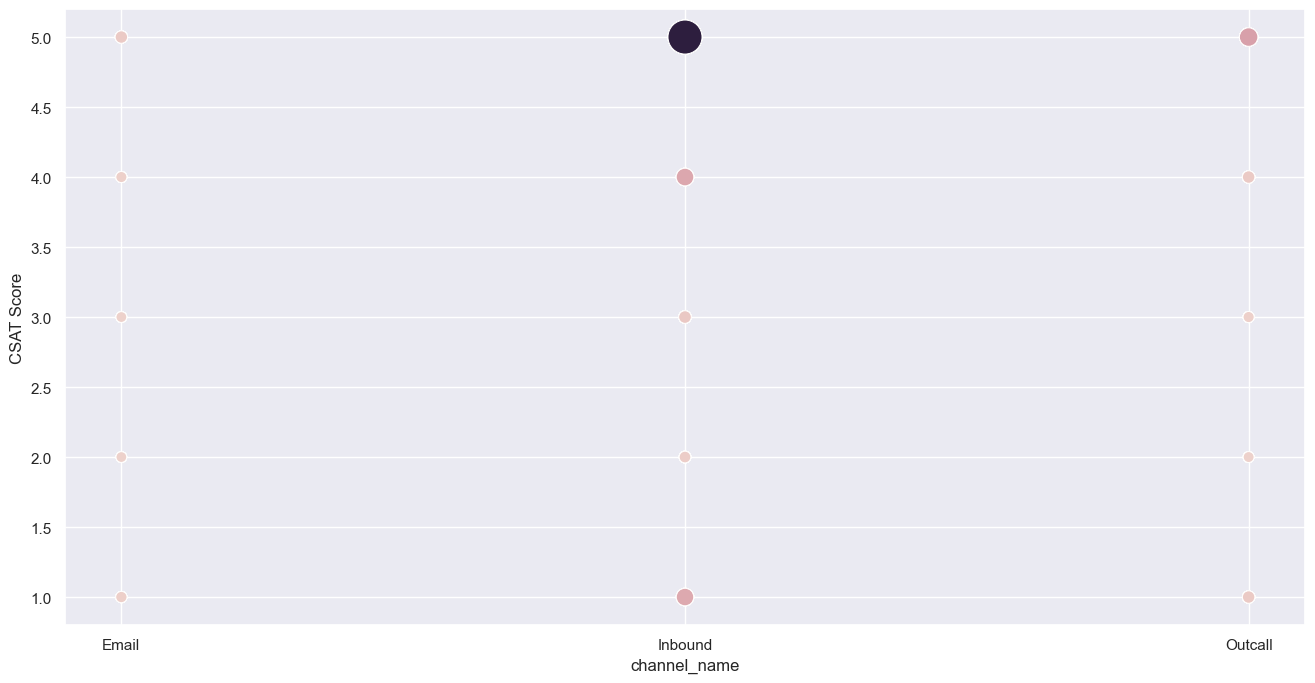

In [6]:
counts = df_cat.groupby(['channel_name', 'CSAT Score']).size().reset_index(name='counts')
df_merged = df_cat.merge(counts, how='left', on=['channel_name', 'CSAT Score'])

average_csat = df_cat.groupby('channel_name')["CSAT Score"].mean().reset_index(name='average_csat')
df_merged = df_merged.merge(average_csat, how='left', on=['channel_name'])
df_merged = df_merged.sort_values(by=['average_csat', 'CSAT Score'], ascending=[True, True])


f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=df_merged, x="channel_name", y="CSAT Score", hue = "counts",size='counts', legend=False, sizes=(60, 600))

#,order=df_cat.groupby('channel_name')['CSAT Score'].mean().sort_values().index

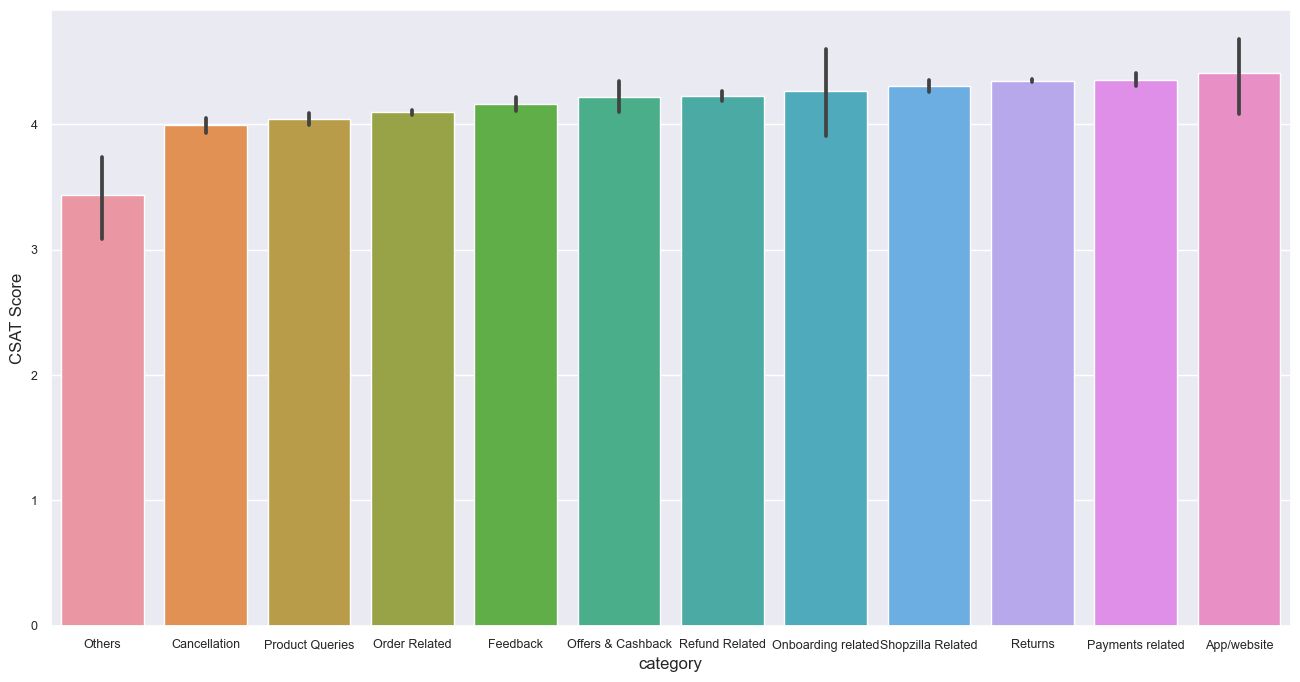

In [7]:
f = plt.figure(figsize=(16, 8))
sb.barplot(data=df_merged, x="category", y="CSAT Score",order=df_cat.groupby('category')['CSAT Score'].mean().sort_values().index)
plt.tick_params(axis='both', which='major', labelsize=9)

### Visualtsation for Sub-category against CSAT
Same thing for the category but there are more values and more obvious difference in average CSAT score.
Commission related, Unable to Login, and Service Center - Service Denial having the 3 lowest average CSAT score

Commission related                  2.333333\
Unable to Login                     2.428571\
Service Center - Service Denial     3.224138

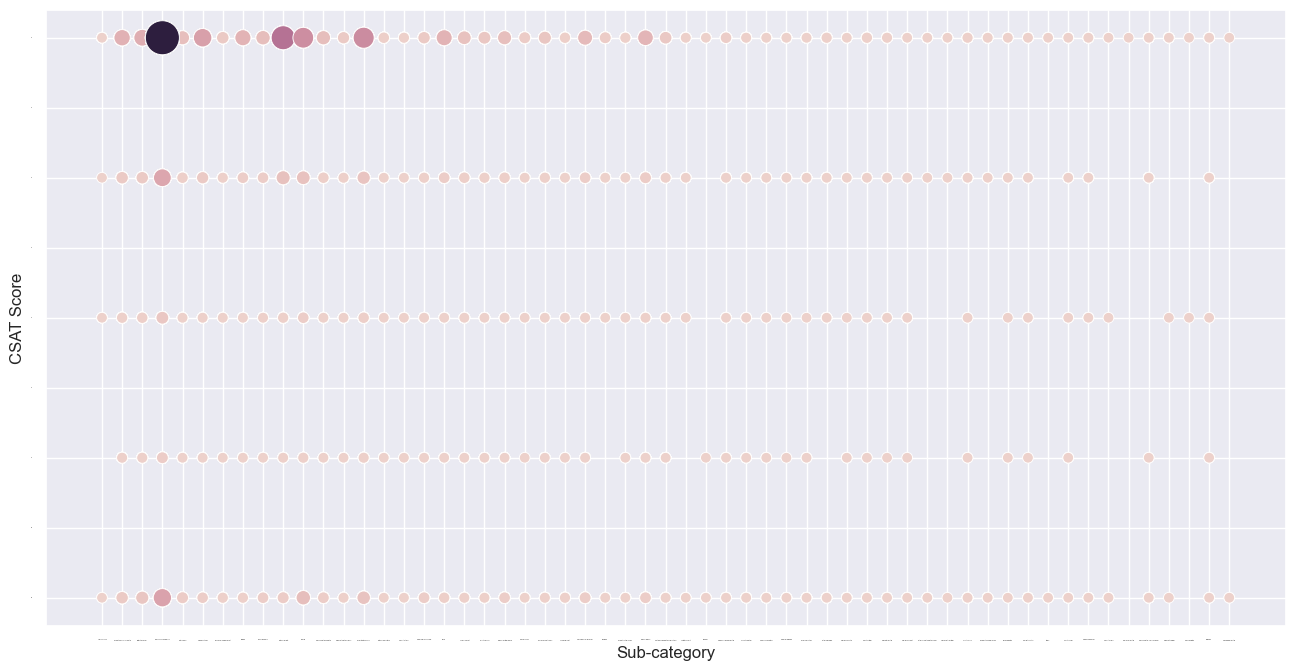

In [8]:
counts = df_cat.groupby(["Sub-category", 'CSAT Score']).size().reset_index(name='counts')
df_merged = df_cat.merge(counts, how='left', on=["Sub-category", 'CSAT Score'])


f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=df_merged, x="Sub-category", y="CSAT Score", hue = "counts",size='counts', legend=False, sizes=(60, 600))
plt.tick_params(axis='both', which='major', labelsize=1)

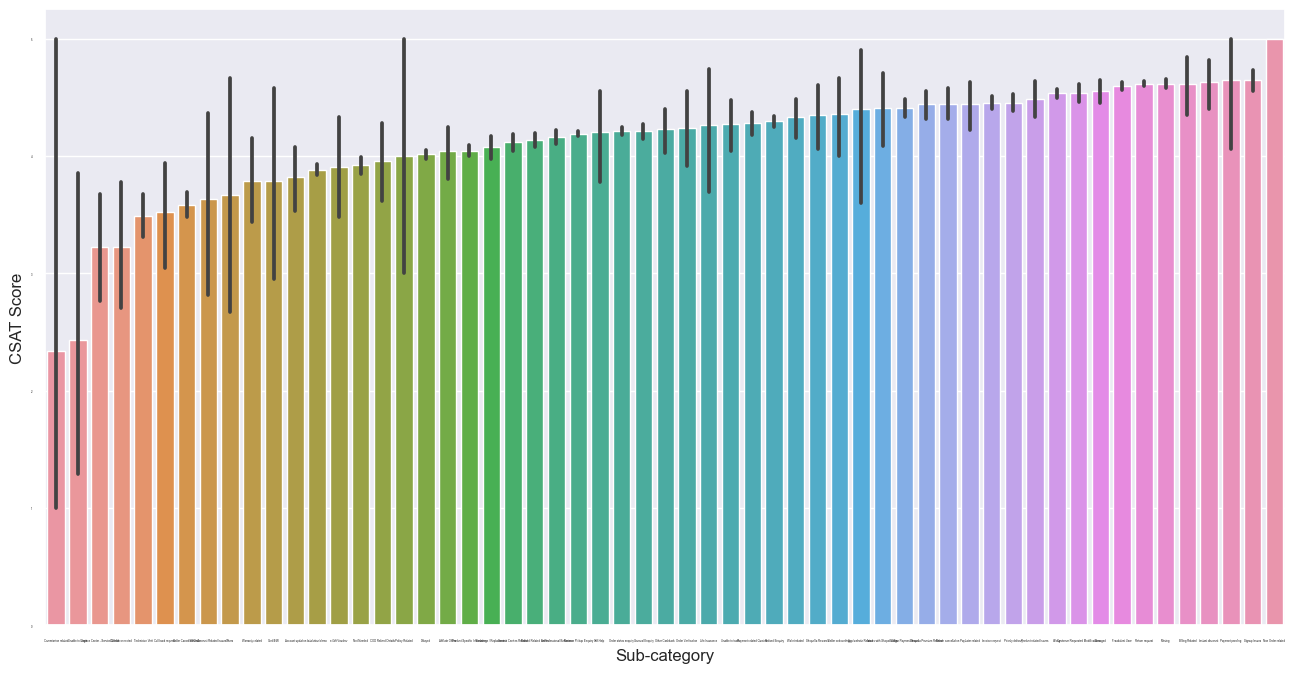

In [9]:
f = plt.figure(figsize=(16, 8))
sb.barplot(data=df_merged, x="Sub-category", y="CSAT Score",order=df_cat.groupby('Sub-category')['CSAT Score'].mean().sort_values().index)
plt.tick_params(axis='both', which='major', labelsize=2)

In [10]:
df_cat.groupby('Sub-category')['CSAT Score'].mean().sort_values()

Sub-category
Commission related                  2.333333
Unable to Login                     2.428571
Service Center - Service Denial     3.224138
Call disconnected                   3.225000
Technician Visit                    3.489418
Call back request                   3.521739
Seller Cancelled Order              3.584514
Other Account Related Issues        3.636364
Others                              3.666667
Warranty related                    3.782051
Card/EMI                            3.789474
Account updation                    3.820000
Installation/demo                   3.883139
e-Gift Voucher                      3.904762
Not Needed                          3.923398
COD Refund Details                  3.952941
Policy Related                      4.000000
Delayed                             4.011781
Affiliate Offers                    4.038462
Product Specific Information        4.044023
Exchange / Replacement              4.071429
Service Centres Related             4.1184

### Visualtsation for Agent Shift against CSAT
No obvious trend as well. All the average CSAT score with different shift timing seems to be around the same range.


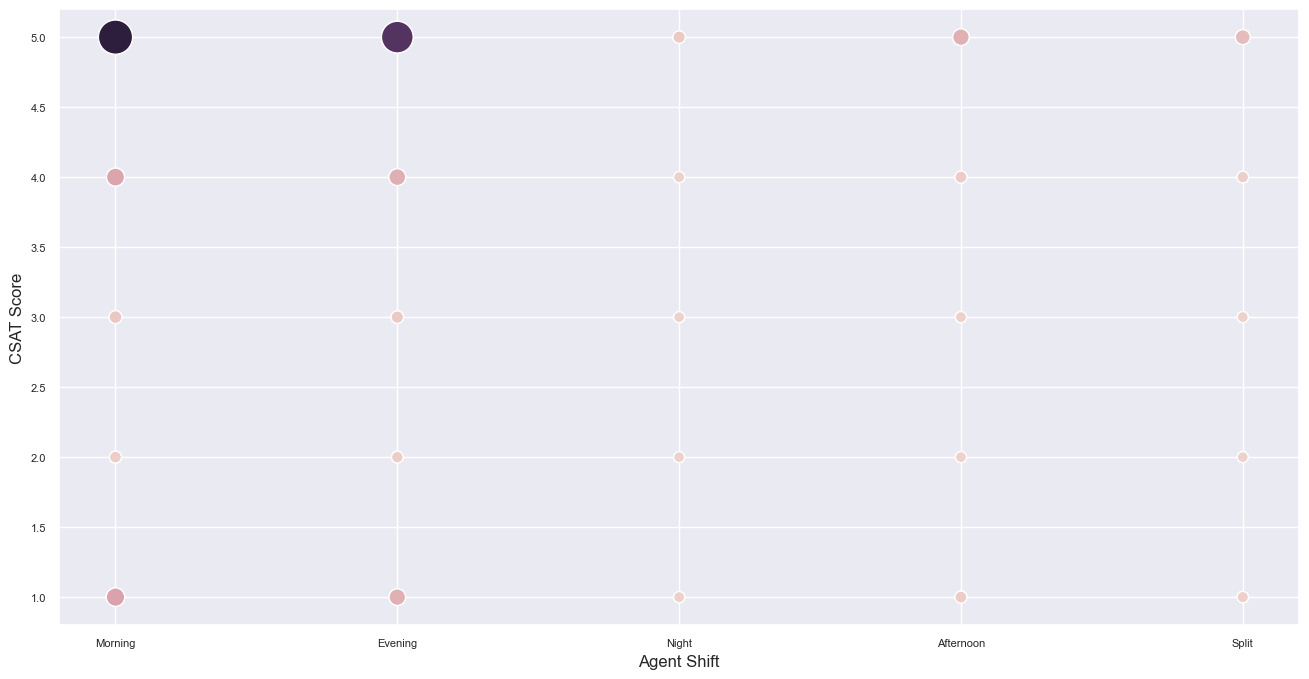

In [11]:
counts = df_cat.groupby(["Agent Shift", 'CSAT Score']).size().reset_index(name='counts')
df_merged = df_cat.merge(counts, how='left', on=["Agent Shift", 'CSAT Score'])

average_csat = df_cat.groupby("Agent Shift")["CSAT Score"].mean().reset_index(name='average_csat')
df_merged = df_merged.merge(average_csat, how='left', on=["Agent Shift"])
df_merged = df_merged.sort_values(by=['average_csat', 'CSAT Score'], ascending=[True, True])

f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=df_merged, x="Agent Shift", y="CSAT Score", hue = "counts",size='counts', legend=False, sizes=(60, 600))
plt.tick_params(axis='both', which='major', labelsize=8)

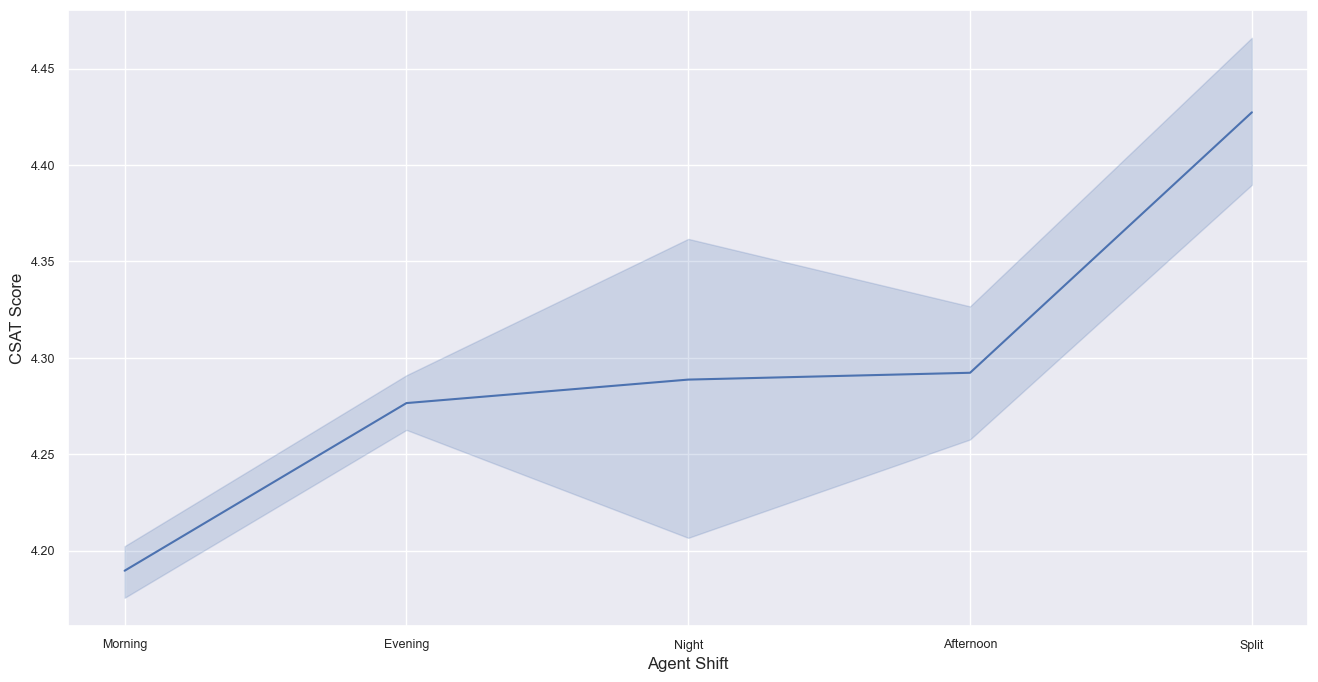

In [12]:
f = plt.figure(figsize=(16, 8))
#df_merged = df_cat.groupby("Agent Shift")['CSAT Score'].mean().sort_values().index
sb.lineplot(data=df_merged, x="Agent Shift", y="CSAT Score")
#sb.lineplot(data=df_merged, x="Agent Shift", y="CSAT Score",order=df_cat.groupby("Agent Shift")['CSAT Score'].mean().sort_values().index)
plt.tick_params(axis='both', which='major', labelsize=9)

### Visualtsation for response_time against CSAT
The data for response time seems to have a heavy positive skew. It is still positively skewed after removing the outliers.
there seems to be a slight trend where the median CSAT score is higher for lower response time.

### Visualtsation for response_time against CSAT
The data for response time seems to have a heavy positive skew. It is still positively skewed after removing the outliers.
there seems to be a slight trend where the median CSAT score is higher for lower response time.

In [13]:



counts = df_num.groupby(['CSAT Score',"response_time_minutes"]).size().reset_index(name='counts')
df_merged = df_num.merge(counts, how='left', on=['CSAT Score',"response_time_minutes"])

average_csat = df_num.groupby("CSAT Score")["response_time_minutes"].mean().reset_index(name='average_response')
df_merged = df_merged.merge(average_csat, how='left', on=["CSAT Score"])
df_merged = df_merged.sort_values(by=['CSAT Score','response_time_minutes'], ascending=[True, True])


<AxesSubplot:xlabel='CSAT Score', ylabel='response_time_minutes'>

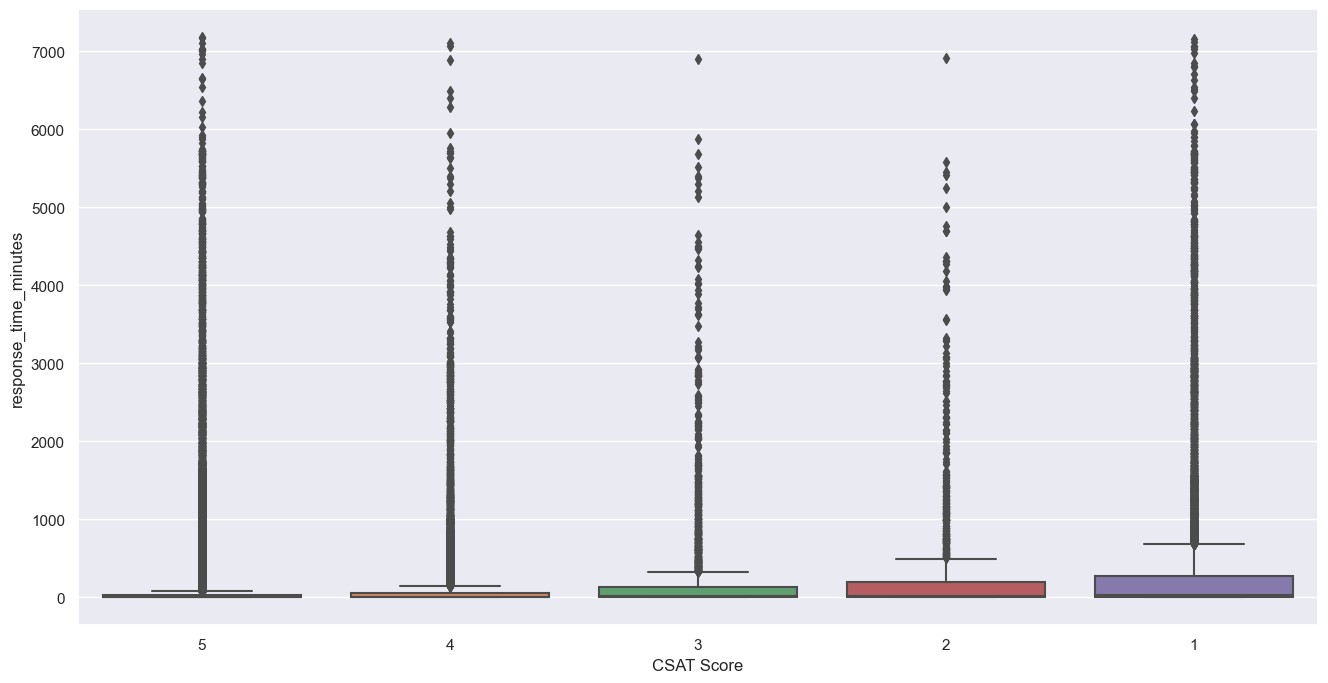

In [14]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(data=df_merged, x='CSAT Score',
           y='response_time_minutes',
           order=df_merged.groupby('CSAT Score')['response_time_minutes'].median().sort_values().index)

<AxesSubplot:xlabel='CSAT Score', ylabel='response_time_minutes'>

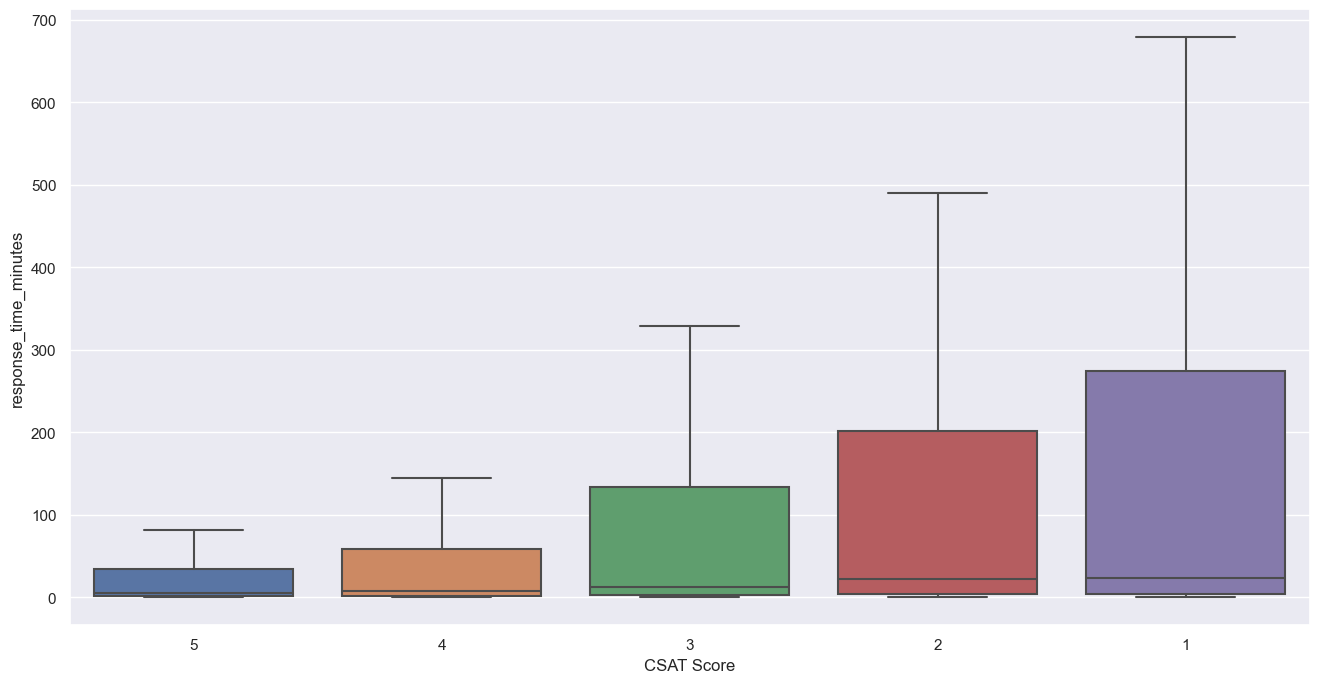

In [15]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(data=df_merged, x='CSAT Score', y='response_time_minutes',
           order=df_merged.groupby('CSAT Score')['response_time_minutes'].median().sort_values().index,
          showfliers=False)

### Visualtsation for remarks length against CSAT
The remarks length suggested that higher number of wordcount tends to accompany a more negative CSAT score.

In [16]:
counts = df_num.groupby(['CSAT Score',"remarks_length"]).size().reset_index(name='counts')
df_merged = df_num.merge(counts, how='left', on=['CSAT Score',"remarks_length"])

average_csat = df_num.groupby("CSAT Score")["remarks_length"].mean().reset_index(name='average_rLength')
df_merged = df_merged.merge(average_csat, how='left', on=["CSAT Score"])
df_merged = df_merged.sort_values(by=['CSAT Score','remarks_length'], ascending=[True, True])

<AxesSubplot:xlabel='CSAT Score', ylabel='remarks_length'>

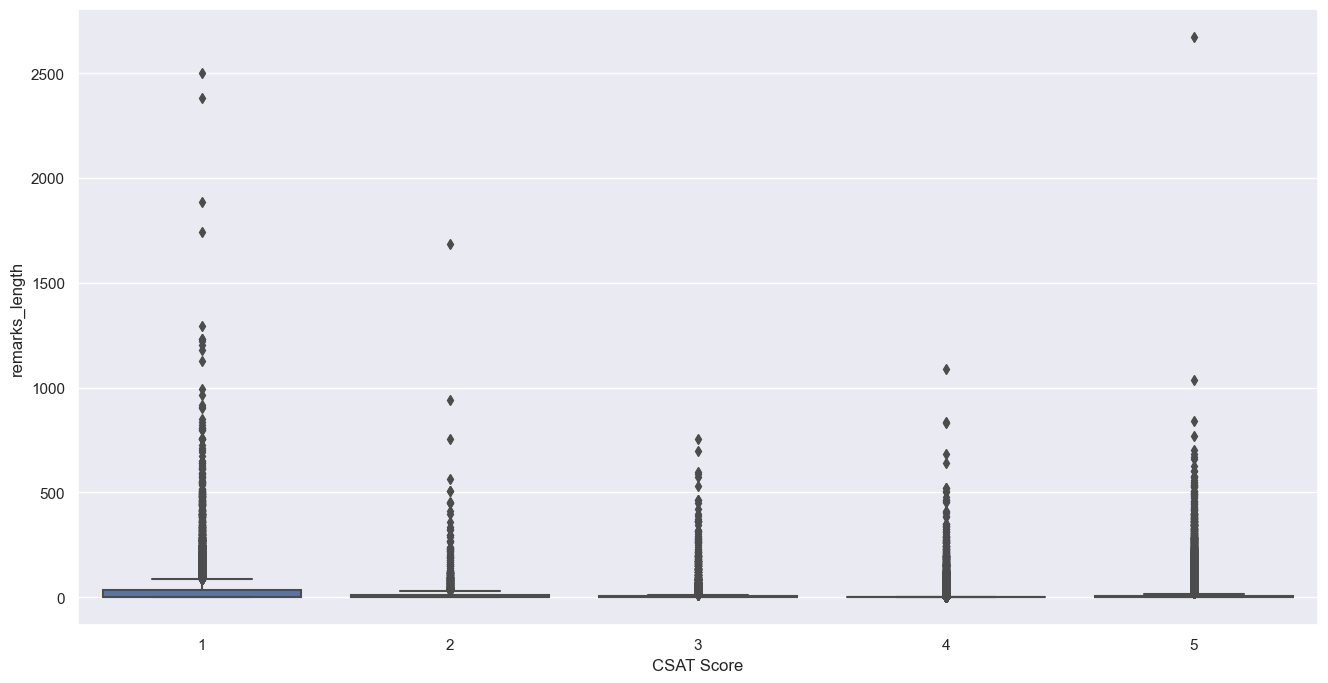

In [17]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(data=df_merged, x='CSAT Score', y='remarks_length',order=df_merged.groupby('CSAT Score')['remarks_length'].median().sort_values().index)

Due to the sheer size of 0 remarks length, all CSAT score have a median remarks length of 0, so we sort if according to mean instead

<AxesSubplot:xlabel='CSAT Score', ylabel='remarks_length'>

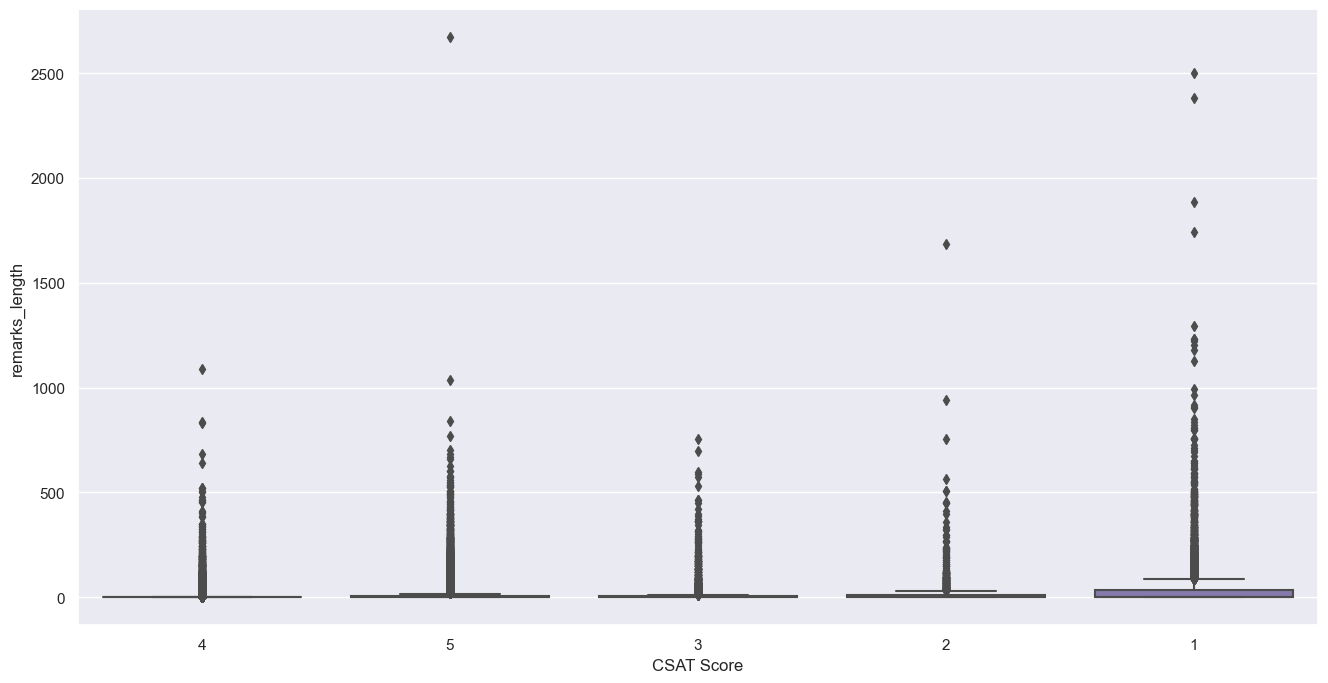

In [18]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(data=df_merged, x='CSAT Score', y='remarks_length',order=df_merged.groupby('CSAT Score')['remarks_length'].mean().sort_values().index)

<AxesSubplot:xlabel='CSAT Score', ylabel='remarks_length'>

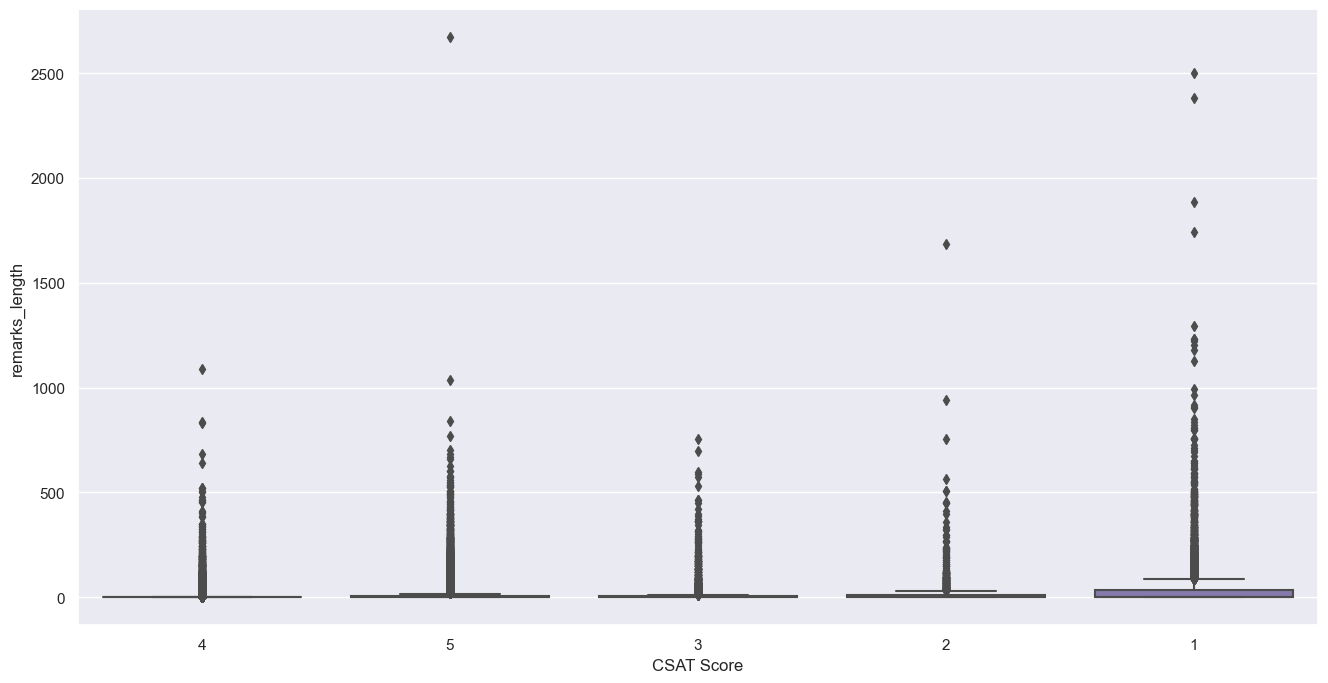

In [19]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(data=df_merged, x='CSAT Score', y='remarks_length',order=df_merged.groupby('CSAT Score')['remarks_length'].mean().sort_values().index)

In [20]:
df_not0 = df_num[df_num["remarks_length"]!=0]
df_not0["remarks_length"]

7          9.0
8         89.0
11         8.0
17        10.0
19         8.0
         ...  
85869    183.0
85870     27.0
85878    205.0
85885     40.0
85886     36.0
Name: remarks_length, Length: 28752, dtype: float64

<AxesSubplot:xlabel='remarks_length', ylabel='Count'>

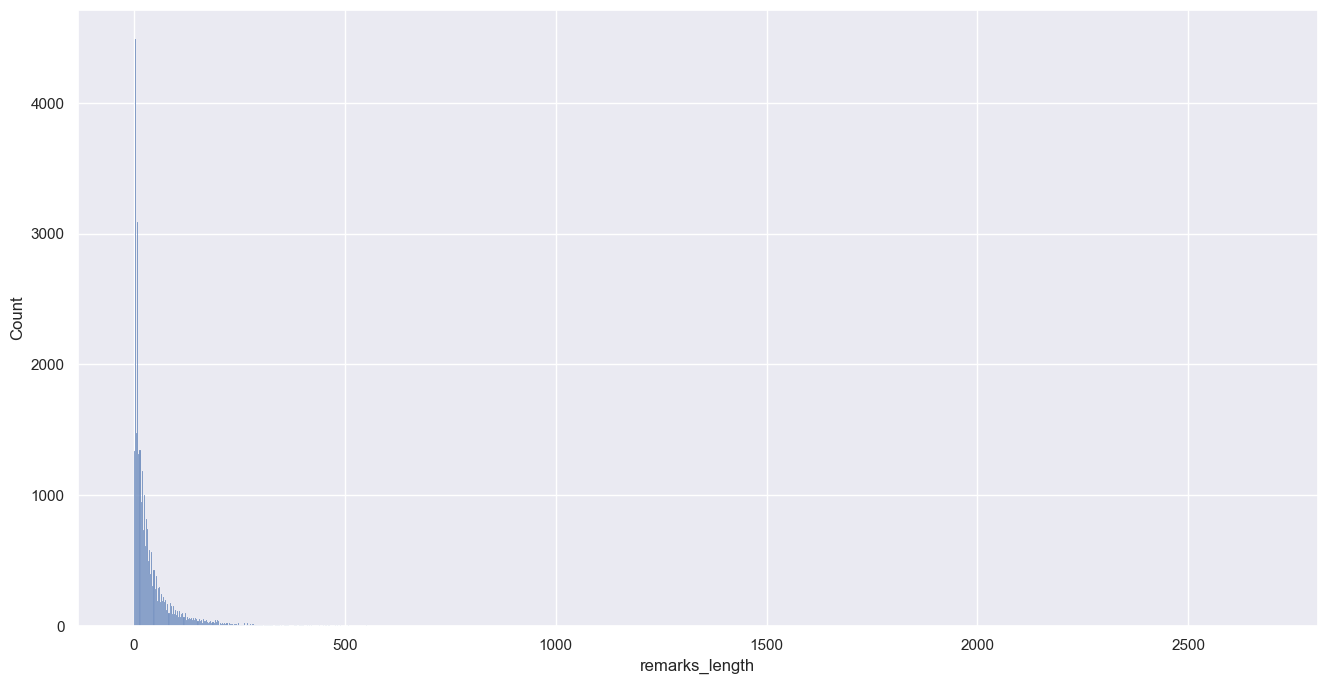

In [21]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data=df_not0["remarks_length"])

In [22]:

counts = df_not0.groupby(['CSAT Score',"remarks_length"]).size().reset_index(name='counts')
df_merged = df_not0.merge(counts, how='left', on=['CSAT Score',"remarks_length"])

average_csat = df_not0.groupby("CSAT Score")["remarks_length"].mean().reset_index(name='average_csat')
df_merged = df_merged.merge(average_csat, how='left', on=["CSAT Score"])
df_merged = df_merged.sort_values(by=['CSAT Score','remarks_length'], ascending=[True, True])

<AxesSubplot:xlabel='CSAT Score', ylabel='remarks_length'>

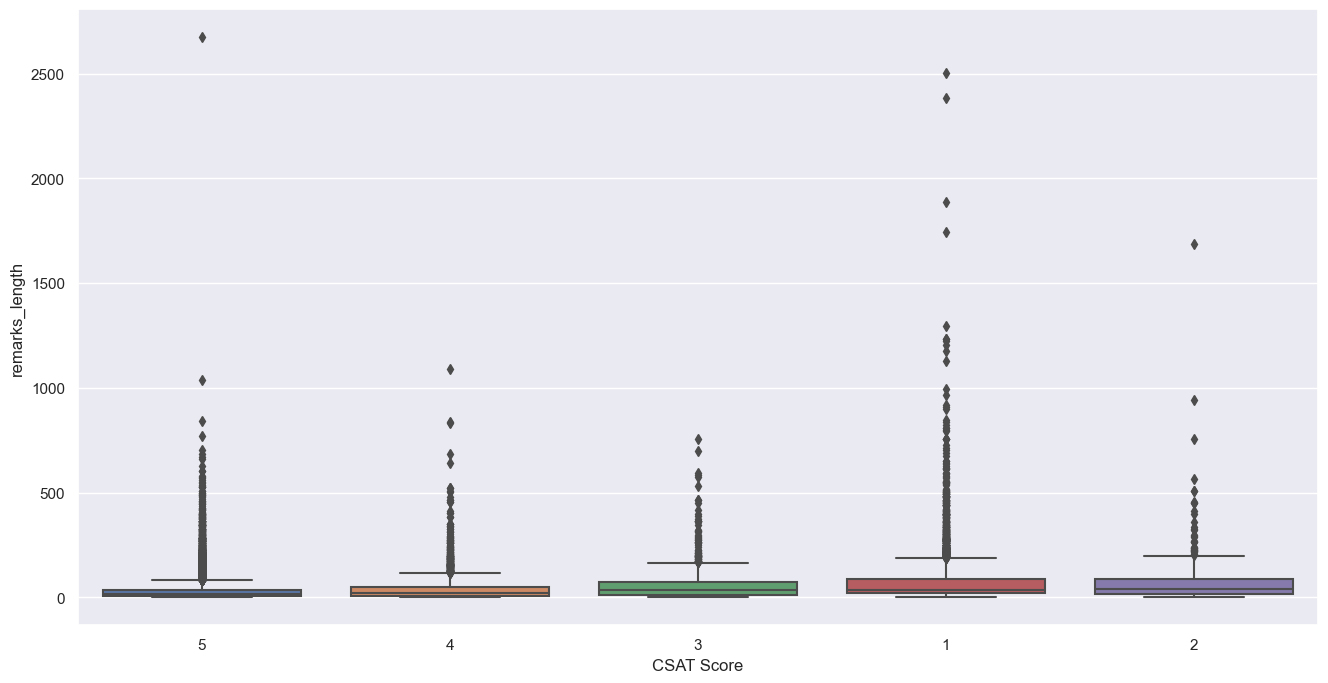

In [23]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(data=df_merged, x='CSAT Score', y='remarks_length',order=df_merged.groupby('CSAT Score')['remarks_length'].median().sort_values().index)

<AxesSubplot:xlabel='CSAT Score', ylabel='remarks_length'>

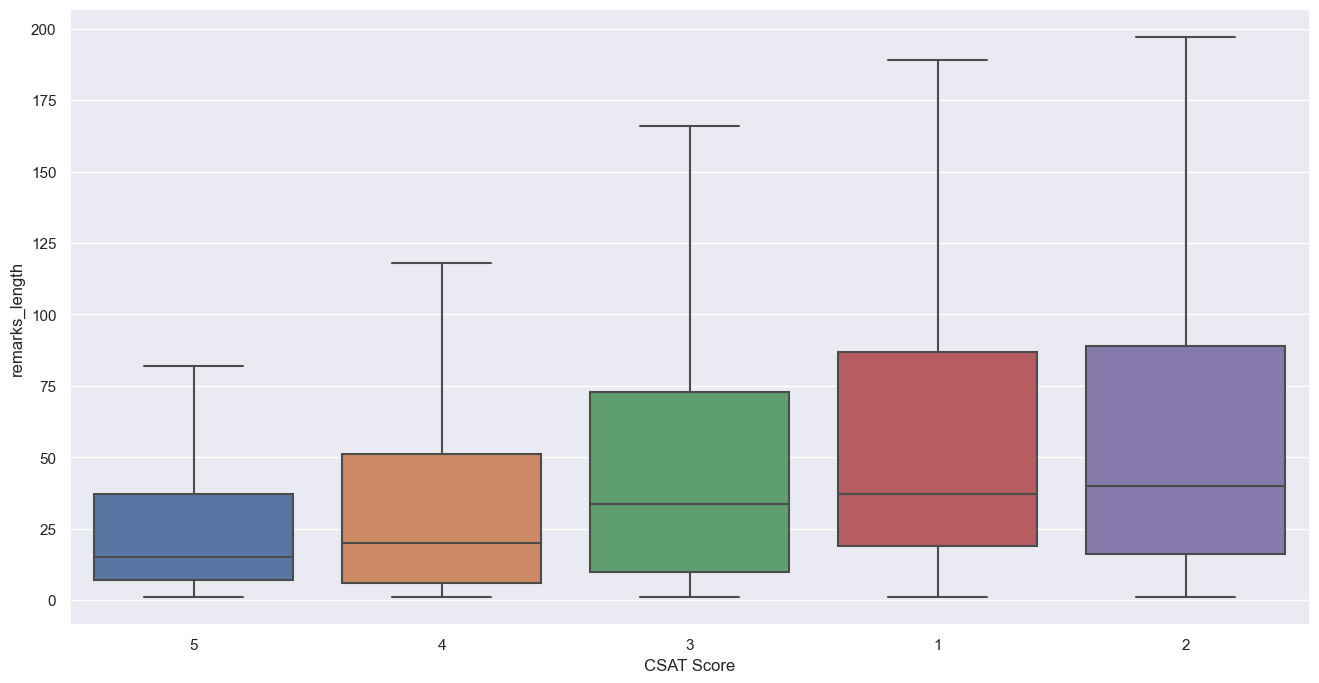

In [24]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(data=df_merged, x='CSAT Score', y='remarks_length',order=df_merged.groupby('CSAT Score')['remarks_length'].median().sort_values().index,showfliers=False)

For customer service tied to an acual order, we will see if there is any visual relationships between Item_price', 'Product_category' and CSAT score.


In [25]:
df2

,channel_name,category,Sub-category,Customer Remarks,Product_category,Item_price,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length,response_time_minutes
0,Inbound,Order Related,Delayed,Very bad,LifeStyle,434.0,>90,Split,1,1,8.0,30.0
1,Inbound,Returns,Service Centres Related,NaN,Electronics,1299.0,0-30,Morning,5,1,0.0,2.0
2,Inbound,Order Related,Installation/demo,All good,Electronics,15990.0,31-60,Evening,5,1,8.0,2.0
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,Electronics,1099.0,31-60,Morning,5,1,0.0,2.0
4,Inbound,Order Related,Order status enquiry,Issue not resolved pathetic service,Mobile,99999.0,On Job Training,Morning,1,1,35.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17191,Inbound,Feedback,UnProfessional Behaviour,NaN,Books & General merchandise,25.0,>90,Morning,5,1,0.0,21.0
17192,Inbound,Order Related,Order status enquiry,Clear all my problem thanks for Shopzilla,Electronics,599.0,On Job Training,Evening,5,1,41.0,1.0
17193,Inbound,Returns,Wrong,NaN,Home Appliences,998.0,>90,Morning,4,1,0.0,6.0
17194,Inbound,Order Related,Delayed,NaN,Books & General merchandise,193.0,>90,Morning,5,1,0.0,3.0


In [26]:
df2_cat = df2[["Product_category","CSAT Score"]]
df2_num = df2[["Item_price","CSAT Score"]]

### Visualtsation for Product_category against CSAT
No clear trend, Giftcard related orders showed lowest average CSAT and affiliates showed highest average CSAT

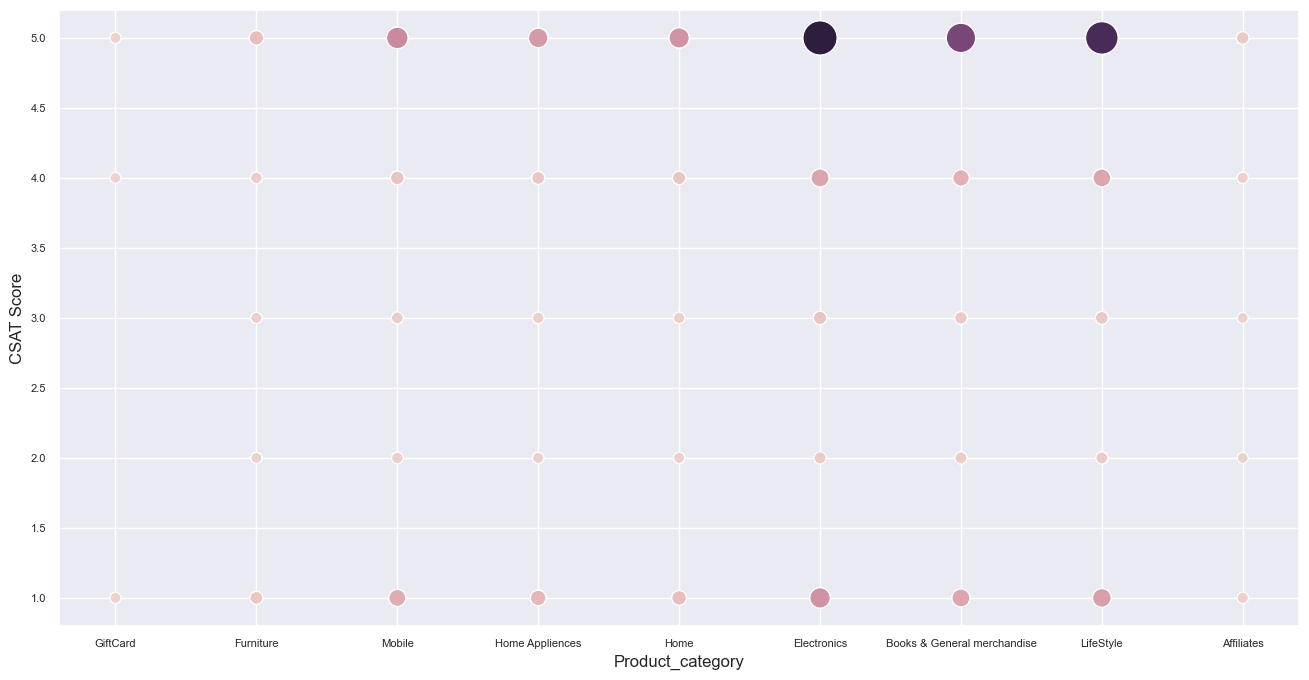

In [27]:
counts = df2_cat.groupby(["Product_category", 'CSAT Score']).size().reset_index(name='counts')
df2_merged = df2_cat.merge(counts, how='left', on=["Product_category", 'CSAT Score'])

average_csat = df2_cat.groupby("Product_category")["CSAT Score"].mean().reset_index(name='average_csat')
df2_merged = df2_merged.merge(average_csat, how='left', on=["Product_category"])
df2_merged = df2_merged.sort_values(by=['average_csat', 'CSAT Score'], ascending=[True, True])

f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=df2_merged, x="Product_category", y="CSAT Score", hue = "counts",size='counts', legend=False, sizes=(60, 600))
plt.tick_params(axis='both', which='major', labelsize=8)

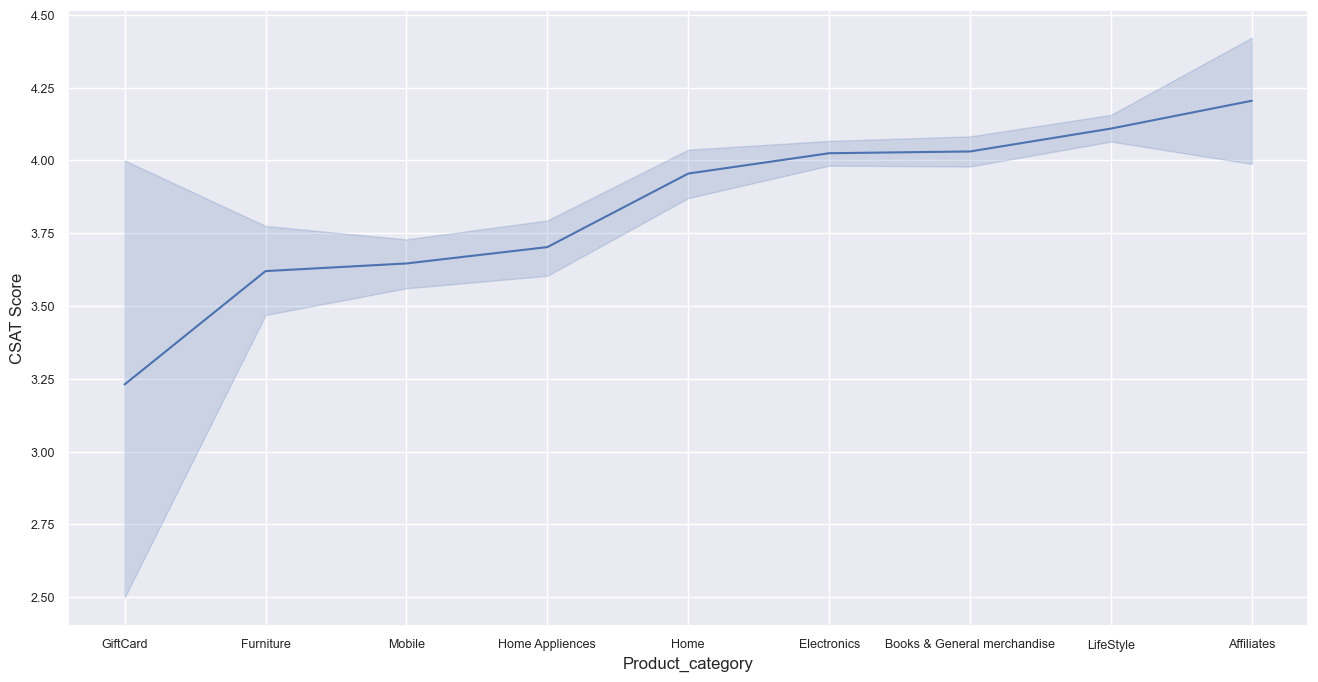

In [28]:
f = plt.figure(figsize=(16, 8))
sb.lineplot(data=df2_merged, x="Product_category", y="CSAT Score")
plt.tick_params(axis='both', which='major', labelsize=9)

### Visualtsation for Item_price against CSAT
No obvious trend between Item_price and CSAT. CSAT score of 1 has the highest median item price.

In [29]:
counts = df2_num.groupby(['CSAT Score',"Item_price"]).size().reset_index(name='counts')
df2_merged = df2_num.merge(counts, how='left', on=['CSAT Score',"Item_price"])

average_csat = df2_num.groupby("CSAT Score")["Item_price"].mean().reset_index(name='average_csat')
df2_merged = df2_merged.merge(average_csat, how='left', on=["CSAT Score"])
df2_merged = df2_merged.sort_values(by=['CSAT Score','Item_price'], ascending=[True, True])

<AxesSubplot:xlabel='CSAT Score', ylabel='Item_price'>

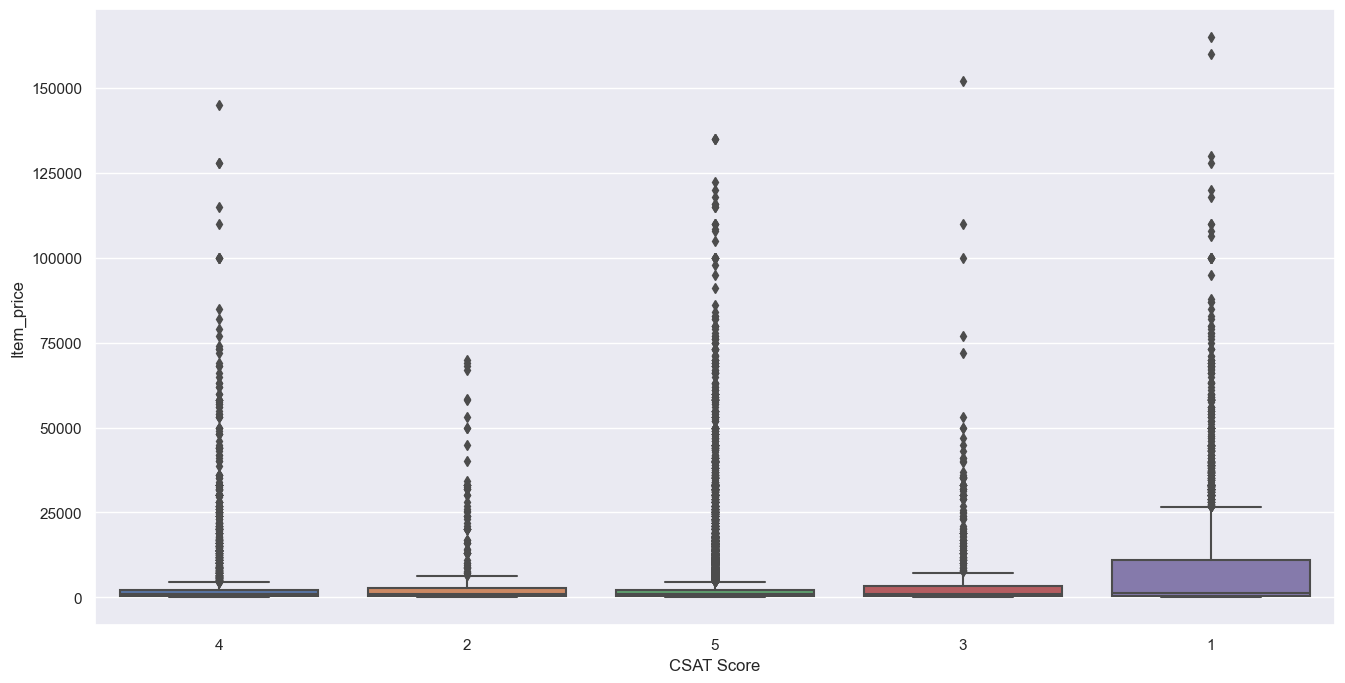

In [30]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(data=df2_merged, x='CSAT Score', y='Item_price',order=df2_merged.groupby('CSAT Score')['Item_price'].median().sort_values().index)

<AxesSubplot:xlabel='CSAT Score', ylabel='Item_price'>

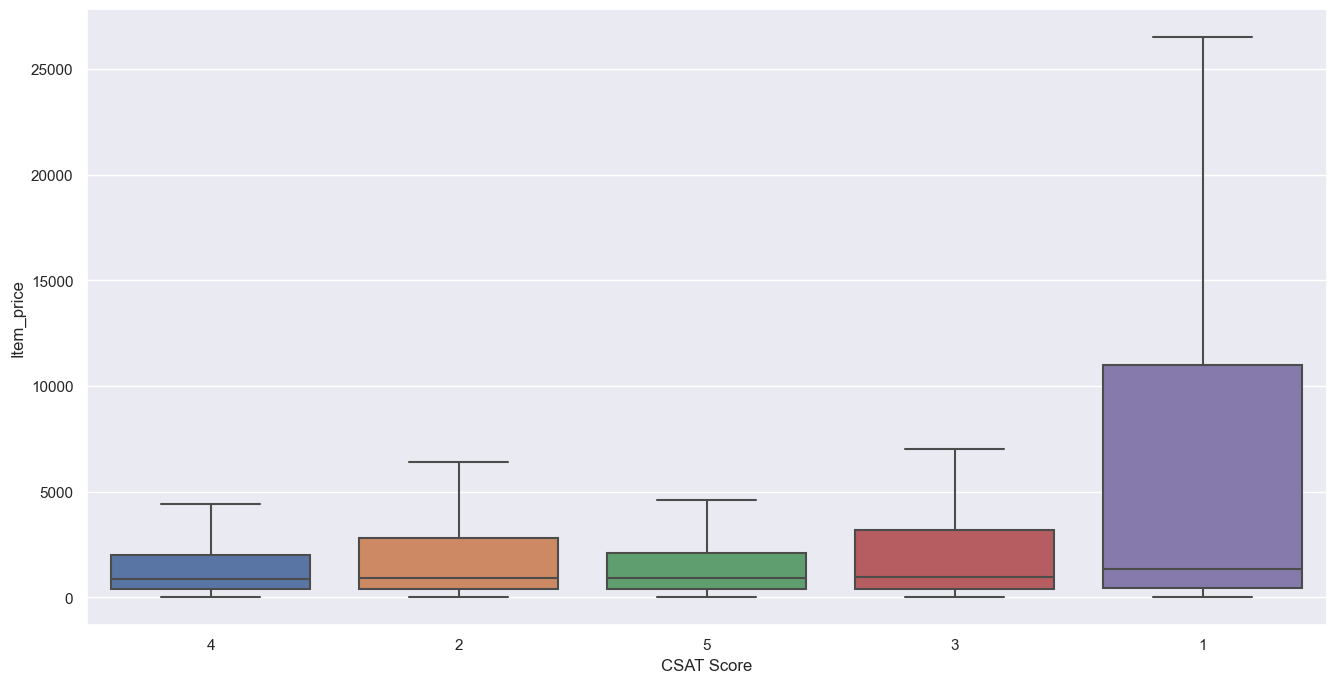

In [31]:
f = plt.figure(figsize=(16, 8))

sb.boxplot(data=df2_merged, x='CSAT Score', y='Item_price',order=df2_merged.groupby('CSAT Score')['Item_price'].median().sort_values().index,
          showfliers=False)

In [32]:
df2 # dataset where all item_price is null and order_made is 0

,channel_name,category,Sub-category,Customer Remarks,Product_category,Item_price,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length,response_time_minutes
0,Inbound,Order Related,Delayed,Very bad,LifeStyle,434.0,>90,Split,1,1,8.0,30.0
1,Inbound,Returns,Service Centres Related,NaN,Electronics,1299.0,0-30,Morning,5,1,0.0,2.0
2,Inbound,Order Related,Installation/demo,All good,Electronics,15990.0,31-60,Evening,5,1,8.0,2.0
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,Electronics,1099.0,31-60,Morning,5,1,0.0,2.0
4,Inbound,Order Related,Order status enquiry,Issue not resolved pathetic service,Mobile,99999.0,On Job Training,Morning,1,1,35.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17191,Inbound,Feedback,UnProfessional Behaviour,NaN,Books & General merchandise,25.0,>90,Morning,5,1,0.0,21.0
17192,Inbound,Order Related,Order status enquiry,Clear all my problem thanks for Shopzilla,Electronics,599.0,On Job Training,Evening,5,1,41.0,1.0
17193,Inbound,Returns,Wrong,NaN,Home Appliences,998.0,>90,Morning,4,1,0.0,6.0
17194,Inbound,Order Related,Delayed,NaN,Books & General merchandise,193.0,>90,Morning,5,1,0.0,3.0


In [33]:
df3 # dataset where all item_price is no-null and order_made is 1

,channel_name,category,Sub-category,Customer Remarks,Product_category,Item_price,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length,response_time_minutes
0,Outcall,Product Queries,Life Insurance,NaN,NaN,NaN,On Job Training,Morning,5,0,0.0,34.0
1,Outcall,Product Queries,Product Specific Information,NaN,NaN,NaN,>90,Morning,5,0,0.0,2.0
2,Inbound,Order Related,Installation/demo,NaN,NaN,NaN,On Job Training,Evening,5,0,0.0,22.0
3,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,>90,Evening,5,0,0.0,20.0
4,Inbound,Cancellation,Not Needed,NaN,NaN,NaN,0-30,Morning,5,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68688,Inbound,Refund Related,Refund Enquiry,NaN,NaN,NaN,On Job Training,Morning,4,0,0.0,482.0
68689,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,NaN,NaN,>90,Morning,5,0,40.0,2.0
68690,Inbound,Order Related,Order status enquiry,need to improve with proper details.,NaN,NaN,On Job Training,Evening,5,0,36.0,5.0
68691,Inbound,Feedback,UnProfessional Behaviour,NaN,NaN,NaN,>90,Morning,4,0,0.0,1.0


In [34]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

We perform SelectKBest on two different dataset, the dataset with order_made and the dataset without order_made

Limitations

Using LabelEncoder on nominal categorical columns create implicit order when numerical values replaces each unique value.\
Using OneHotEncoding for feature selection using SelectKBest is also unfeasible since each column receives a score independent from the original column it derived from.

LabelEncoder gives naturally ordinal numerical features higher score than nominal categorical features.\
We will continue to filter out bad features under supervised feature selection during the learning machine process and optimization.

Below is the result of applying LabelEncoder for the SelectKBest() method 

In [35]:
tenure_order = {'On Job Training': 0, '0-30': 1, '31-60': 2, '61-90': 3, '>90': 4}
df1["Tenure Bucket"] = df1["Tenure Bucket"].map(tenure_order)
df2["Tenure Bucket"] = df2["Tenure Bucket"].map(tenure_order)
df3["Tenure Bucket"] = df3["Tenure Bucket"].map(tenure_order)

df1_cat = df1[["channel_name","category","Sub-category","Agent Shift","Product_category","CSAT Score"]]
df1_num = df1[["Tenure Bucket","remarks_length","response_time_minutes","Item_price","CSAT Score"]]

df2_cat = df2[["channel_name","category","Sub-category","Agent Shift","Product_category","CSAT Score"]]
df2_num = df2[["Tenure Bucket","remarks_length","response_time_minutes","Item_price","CSAT Score"]]

df3_cat = df3[["channel_name","category","Sub-category","Agent Shift","CSAT Score"]]
df3_num = df3[["Tenure Bucket","remarks_length","response_time_minutes","CSAT Score"]]

In [38]:

df2=df2.drop(["Order_made","Customer Remarks"],axis=1)
df3=df3.drop(["Order_made","Customer Remarks","Product_category","Item_price"],axis=1)

In [39]:
df2.isnull().sum()

channel_name             0
category                 0
Sub-category             0
Product_category         0
Item_price               0
Tenure Bucket            0
Agent Shift              0
CSAT Score               0
remarks_length           0
response_time_minutes    0
dtype: int64

In [40]:
df3.isnull().sum()

channel_name             0
category                 0
Sub-category             0
Tenure Bucket            0
Agent Shift              0
CSAT Score               0
remarks_length           0
response_time_minutes    0
dtype: int64

In [41]:
#replace NaN values for "Item_price" with 0
df1["Item_price"] = df1["Item_price"].fillna(0)
df2["Item_price"] = df2["Item_price"].fillna(0)

In [42]:
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df1['binned_item_price'] = est.fit_transform(df1[['Item_price']])
df1['binned_response_time'] = est.fit_transform(df1[['response_time_minutes']])
df1['binned_remarks_length'] = est.fit_transform(df1[['remarks_length']])

df2['binned_item_price'] = est.fit_transform(df2[['Item_price']])
df2['binned_response_time'] = est.fit_transform(df2[['response_time_minutes']])
df2['binned_remarks_length'] = est.fit_transform(df2[['remarks_length']])

df3['binned_response_time'] = est.fit_transform(df3[['response_time_minutes']])
df3['binned_remarks_length'] = est.fit_transform(df3[['remarks_length']])

Encode the categorical features for SelectKBest

In [43]:
for col in ["channel_name","category","Sub-category","Agent Shift"]:
    df3[col] = LabelEncoder().fit_transform(df3[col])
    
for col in ["channel_name","category","Sub-category","Agent Shift","Product_category"]:
    df2[col] = LabelEncoder().fit_transform(df2[col])
    
X2 = df2.drop("CSAT Score", axis=1)
y2 = df2["CSAT Score"]

X3 = df3.drop("CSAT Score", axis=1)
y3 = df3["CSAT Score"]





SelectKBest using score function of mutual_info_classif,which is used for classification problems and computes mutual information between two discrete variables.\
It is based on the concept of mutual information, which measures the amount of information shared between two variables. It computes the mutual information between each feature and the target variable. Features that are highly informative with respect to the target variable will have high scores.\

for data consisting of both categorical and numerical variables

In [44]:
selector2 = SelectKBest(mutual_info_classif, k='all')
X_new2 = selector2.fit_transform(X2, y2)

feature_scores2 = pd.DataFrame({'Feature': X2.columns, 'Score': selector2.scores_})
print("data with order made:")
print(feature_scores2.sort_values(by='Score', ascending=False))
print()


selector3 = SelectKBest(mutual_info_classif, k='all')
X_new3 = selector3.fit_transform(X3, y3)

feature_scores3 = pd.DataFrame({'Feature': X3.columns, 'Score': selector3.scores_})
print("data without order made:")
print(feature_scores3.sort_values(by='Score', ascending=False))

data with order made:
                  Feature     Score
7          remarks_length  0.040074
8   response_time_minutes  0.028456
4              Item_price  0.021823
2            Sub-category  0.016961
10   binned_response_time  0.009700
9       binned_item_price  0.008818
3        Product_category  0.004077
5           Tenure Bucket  0.003998
6             Agent Shift  0.003456
0            channel_name  0.002322
1                category  0.000000
11  binned_remarks_length  0.000000

data without order made:
                 Feature     Score
5         remarks_length  0.023621
2           Sub-category  0.019120
6  response_time_minutes  0.017616
1               category  0.007999
0           channel_name  0.005112
4            Agent Shift  0.004787
3          Tenure Bucket  0.002800
8  binned_remarks_length  0.002036
7   binned_response_time  0.000000


SelectKBest using score function of chi2, which is used for classification problems and computes chi-squared statistics between each feature and target.\
It is used to test the independence between two categorical variables. In feature selection, it computes the chi-squared statistic between each feature and the target variable. Features that are highly correlated with the target variable will have higher scores.\

Good choice for ata consisting of only categorical values.

In [45]:
X2 = df2.drop(["CSAT Score","remarks_length","response_time_minutes","Item_price"], axis=1)
y2 = df2["CSAT Score"]

X3 = df3.drop(["CSAT Score","remarks_length","response_time_minutes"], axis=1)
y3 = df3["CSAT Score"]



In [46]:



selector2 = SelectKBest(chi2, k='all')
X_new2 = selector2.fit_transform(X2, y2)

feature_scores2 = pd.DataFrame({'Feature': X2.columns, 'Score': selector2.scores_})
print("data with order made:")
print(feature_scores2.sort_values(by='Score', ascending=False))
print()


selector3 = SelectKBest(chi2, k='all')
X_new3 = selector3.fit_transform(X3, y3)

feature_scores3 = pd.DataFrame({'Feature': X3.columns, 'Score': selector3.scores_})
print("data without order made:")
print(feature_scores3.sort_values(by='Score', ascending=False))

data with order made:
                 Feature        Score
7   binned_response_time  1613.054202
8  binned_remarks_length   623.460276
6      binned_item_price   427.172333
1               category   139.784332
3       Product_category    37.384095
2           Sub-category    35.868476
4          Tenure Bucket    29.353349
0           channel_name     5.193461
5            Agent Shift     2.352794

data without order made:
                 Feature       Score
5   binned_response_time  885.064533
6  binned_remarks_length  761.845030
1               category  245.383817
3          Tenure Bucket  214.432820
2           Sub-category  152.995974
0           channel_name    1.949421
4            Agent Shift    0.866241


In [47]:
df2["binned_response_time"].value_counts()

0.0    14053
1.0     1177
3.0      527
2.0      495
4.0      313
5.0      266
6.0      184
7.0      130
9.0       29
8.0       22
Name: binned_response_time, dtype: int64

In [48]:
df1.isna().sum()

channel_name                 0
category                     0
Sub-category                 0
Customer Remarks         57137
Product_category         68693
Item_price                   0
Tenure Bucket                0
Agent Shift                  0
CSAT Score                   0
Order_made                   0
remarks_length               0
response_time_minutes        0
binned_item_price            0
binned_response_time         0
binned_remarks_length        0
dtype: int64

In [49]:
df1["Customer Remarks"] = df1["Customer Remarks"].fillna('na')
df1["Product_category"] = df1["Product_category"].fillna('na')

In [50]:
for col in ["channel_name","category","Sub-category","Agent Shift","Product_category"]:
    df1[col] = LabelEncoder().fit_transform(df1[col])

In [ ]:
df1

Next we see if the order_made variable has a high score or not.

In [51]:
X1 = df1.drop(["CSAT Score","Customer Remarks"], axis=1)
y1 = df1["CSAT Score"]

selector1 = SelectKBest(mutual_info_classif, k='all')
X_new1 = selector1.fit_transform(X1, y1)

feature_scores1 = pd.DataFrame({'Feature': X1.columns, 'Score': selector1.scores_})
print("data with both:")
print(feature_scores1.sort_values(by='Score', ascending=False))
print()


data with both:
                  Feature     Score
8          remarks_length  0.029071
2            Sub-category  0.021593
9   response_time_minutes  0.021351
3        Product_category  0.012853
1                category  0.010962
11   binned_response_time  0.009875
4              Item_price  0.009791
0            channel_name  0.007576
7              Order_made  0.005334
5           Tenure Bucket  0.005135
6             Agent Shift  0.003786
10      binned_item_price  0.002800
12  binned_remarks_length  0.001760



In [53]:
X1 = df1.drop(["CSAT Score","Customer Remarks","remarks_length","response_time_minutes","Item_price"], axis=1)
y1 = df1["CSAT Score"]

selector1 = SelectKBest(chi2, k='all')
X_new1 = selector1.fit_transform(X1, y1)

feature_scores1 = pd.DataFrame({'Feature': X1.columns, 'Score': selector1.scores_})
print("data with both:")
print(feature_scores1.sort_values(by='Score', ascending=False))
print()

data with both:
                 Feature        Score
8   binned_response_time  4331.829542
7      binned_item_price  1234.431393
9  binned_remarks_length  1029.841959
6             Order_made   701.988718
1               category   473.087460
3       Product_category   326.682078
2           Sub-category   317.050730
4          Tenure Bucket   205.193208
0           channel_name    11.316156
5            Agent Shift     0.922957



In [54]:
df1

,channel_name,category,Sub-category,Customer Remarks,Product_category,Item_price,Tenure Bucket,Agent Shift,CSAT Score,Order_made,remarks_length,response_time_minutes,binned_item_price,binned_response_time,binned_remarks_length
0,2,8,19,na,9,0.0,0,2,5,0,0.0,34.0,0.0,0.0,0.0
1,2,8,34,na,9,0.0,4,2,5,0,0.0,2.0,0.0,0.0,0.0
2,1,5,15,na,9,0.0,0,1,5,0,0.0,22.0,0.0,0.0,0.0
3,1,10,40,na,9,0.0,4,1,5,0,0.0,20.0,0.0,0.0,0.0
4,1,1,22,na,9,0.0,1,2,5,0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85884,1,9,36,na,9,0.0,0,2,4,0,0.0,482.0,0.0,0.0,0.0
85885,1,5,42,Supported team customer executive good,9,0.0,4,2,5,0,40.0,2.0,0.0,0.0,0.0
85886,1,5,25,need to improve with proper details.,9,0.0,0,1,5,0,36.0,5.0,0.0,0.0,0.0
85887,1,2,50,na,9,0.0,4,2,4,0,0.0,1.0,0.0,0.0,0.0


features that have low scores:\
'channel_name' and 'Agent Shift'

features that have high scores:\
'response_time', 'remarks_length', 'Item_price','category'

Addtionally, it seems 'Order_made' had a decent chi2 score, so we should include "Product_category" as one of the predictors. 'na' values would indicated 'Order_made' is 0.



In [55]:
df1 = df1.drop(['channel_name','Sub-category','Agent Shift','Order_made'],axis=1)
df1

,category,Customer Remarks,Product_category,Item_price,Tenure Bucket,CSAT Score,remarks_length,response_time_minutes,binned_item_price,binned_response_time,binned_remarks_length
0,8,na,9,0.0,0,5,0.0,34.0,0.0,0.0,0.0
1,8,na,9,0.0,4,5,0.0,2.0,0.0,0.0,0.0
2,5,na,9,0.0,0,5,0.0,22.0,0.0,0.0,0.0
3,10,na,9,0.0,4,5,0.0,20.0,0.0,0.0,0.0
4,1,na,9,0.0,1,5,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
85884,9,na,9,0.0,0,4,0.0,482.0,0.0,0.0,0.0
85885,5,Supported team customer executive good,9,0.0,4,5,40.0,2.0,0.0,0.0,0.0
85886,5,need to improve with proper details.,9,0.0,0,5,36.0,5.0,0.0,0.0,0.0
85887,2,na,9,0.0,4,4,0.0,1.0,0.0,0.0,0.0


In [56]:
df1.to_csv('data_ML.csv',index=False)